In [1]:
import pandas as pd
import numpy as np

## Importing Dataset¶

In [2]:
fake_df = pd.read_csv("Fake.csv")
true_df = pd.read_csv("True.csv")

In [3]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
true_df.shape

(21417, 4)

In [6]:
fake_df.shape

(23481, 4)

## Inserting a Target Column "label"

In [7]:
fake_df["label"] = 0
true_df["label"] = 1

## Merging True and Fake Dataframes¶

In [8]:
news = pd.concat([fake_df, true_df], axis=0)

In [9]:
news.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [10]:
news.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [11]:
news.shape

(44898, 5)

In [12]:
news.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


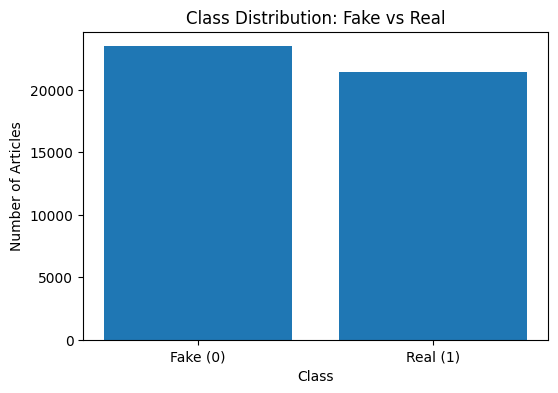

In [13]:
import matplotlib.pyplot as plt

label_counts = news['label'].value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(['Fake (0)', 'Real (1)'], label_counts.values)
plt.title("Class Distribution: Fake vs Real")
plt.xlabel("Class")
plt.ylabel("Number of Articles")
plt.show()

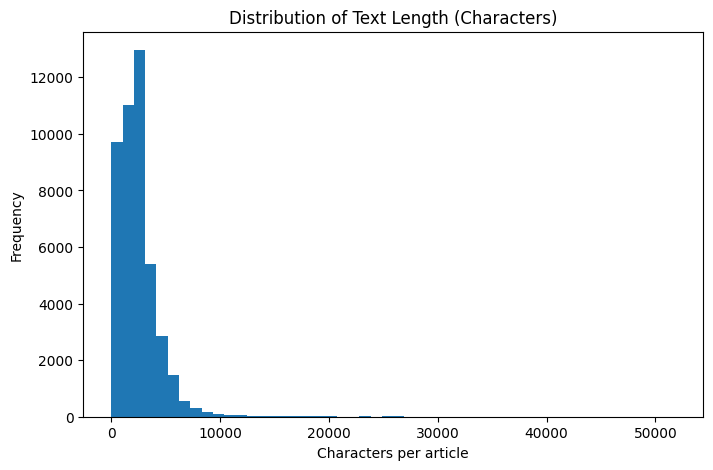

In [14]:
news['char_len'] = news['text'].apply(len)

plt.figure(figsize=(8,5))
plt.hist(news['char_len'], bins=50)
plt.title("Distribution of Text Length (Characters)")
plt.xlabel("Characters per article")
plt.ylabel("Frequency")
plt.show()

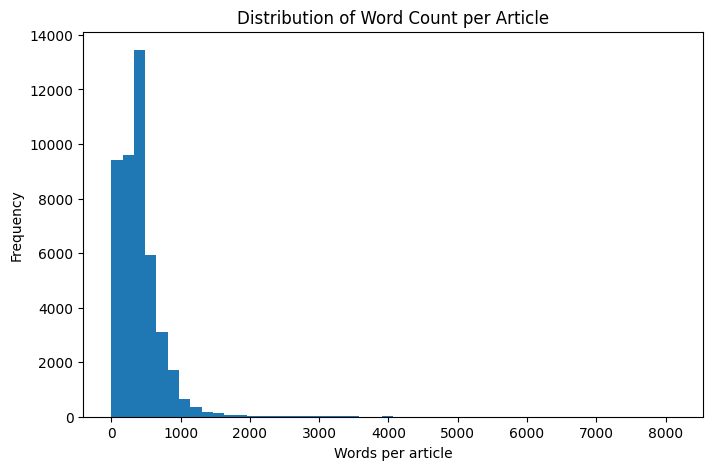

In [15]:
news['word_count'] = news['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
plt.hist(news['word_count'], bins=50)
plt.title("Distribution of Word Count per Article")
plt.xlabel("Words per article")
plt.ylabel("Frequency")
plt.show()

## Removing unnecessary columns

In [16]:
news = news.drop(['title','subject','date'],axis=1)

In [17]:
news.head()

,text,label,char_len,word_count
0,Donald Trump just couldn t wish all Americans ...,0,2893,495
1,House Intelligence Committee Chairman Devin Nu...,0,1898,305
2,"On Friday, it was revealed that former Milwauk...",0,3597,580
3,"On Christmas day, Donald Trump announced that ...",0,2774,444
4,Pope Francis used his annual Christmas Day mes...,0,2346,420


## Reshuffling the dataframe¶

In [18]:
news = news.sample(frac=1) #Reshuffling

In [19]:
news.head()

,text,label,char_len,word_count
235,LONDON (Reuters) - U.S. congressional committe...,1,2683,420
17965,TBILISI (Reuters) - Georgian President Giorgi ...,1,1854,295
21620,"Like Obama and his regime, this Occupier and O...",0,3054,515
13516,COPENHAGEN (Reuters) - Iceland s opposition le...,1,2240,351
5851,It looks like Donald Trump is having another r...,0,1872,308


In [20]:
news.reset_index(inplace=True)

In [21]:
news.head()

,index,text,label,char_len,word_count
0,235,LONDON (Reuters) - U.S. congressional committe...,1,2683,420
1,17965,TBILISI (Reuters) - Georgian President Giorgi ...,1,1854,295
2,21620,"Like Obama and his regime, this Occupier and O...",0,3054,515
3,13516,COPENHAGEN (Reuters) - Iceland s opposition le...,1,2240,351
4,5851,It looks like Donald Trump is having another r...,0,1872,308


In [22]:
news.drop(['index'],axis=1, inplace = True)

In [23]:
news.head()

,text,label,char_len,word_count
0,LONDON (Reuters) - U.S. congressional committe...,1,2683,420
1,TBILISI (Reuters) - Georgian President Giorgi ...,1,1854,295
2,"Like Obama and his regime, this Occupier and O...",0,3054,515
3,COPENHAGEN (Reuters) - Iceland s opposition le...,1,2240,351
4,It looks like Donald Trump is having another r...,0,1872,308


In [24]:
import re

## Creating a Text Preprocessing Function

In [25]:
def wordopt(text):
    #converting into lowercase
    text = text.lower()

    #Removing URL
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    #Removing HTML tags
    text = re.sub(r'<.*?>', '', text)

    #Removing punctuation
    text = re.sub(r'[^\w\s]', '', text)

    #Removing digits
    text = re.sub(r'\d', '', text)

    #Removing newline characters
    text = re.sub(r'\n', ' ', text)

    return text
    

In [26]:
news['text'] = news['text'].apply(wordopt)

In [27]:
news['text']

0        london reuters  us congressional committee mem...
1        tbilisi reuters  georgian president giorgi mar...
2        like obama and his regime this occupier and ob...
3        copenhagen reuters  iceland s opposition leade...
4        it looks like donald trump is having another r...
                               ...                        
44893    washington reuters  puerto rico struggling to ...
44894    warning graphic photo and videothank goodness ...
44895    washington reuters  the trump administration i...
44896    washington reuters  standing in front of a mem...
44897    washington reuters  us president donald trump ...
Name: text, Length: 44898, dtype: object

In [28]:
X = news['text']
y = news['label']

In [29]:
X

0        london reuters  us congressional committee mem...
1        tbilisi reuters  georgian president giorgi mar...
2        like obama and his regime this occupier and ob...
3        copenhagen reuters  iceland s opposition leade...
4        it looks like donald trump is having another r...
                               ...                        
44893    washington reuters  puerto rico struggling to ...
44894    warning graphic photo and videothank goodness ...
44895    washington reuters  the trump administration i...
44896    washington reuters  standing in front of a mem...
44897    washington reuters  us president donald trump ...
Name: text, Length: 44898, dtype: object

In [30]:
y

0        1
1        1
2        0
3        1
4        0
        ..
44893    1
44894    0
44895    1
44896    1
44897    1
Name: label, Length: 44898, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state = 42)

In [33]:
X_train.shape

(31428,)

In [34]:
X_test.shape

(13470,)

## Feature Extraction

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
vectorization = TfidfVectorizer()

In [37]:
xv_train = vectorization.fit_transform(X_train)

In [38]:
xv_test = vectorization.transform(X_test)

In [39]:
xv_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6451341 stored elements and shape (31428, 174927)>

In [40]:
xv_test

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2729078 stored elements and shape (13470, 174927)>

### Logistic Regression Model

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
LR = LogisticRegression(max_iter=1000)

In [43]:
LR.fit(xv_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [44]:
pred_lr = LR.predict(xv_test)

In [45]:
LR.score(xv_test, y_test)

0.987750556792873

In [46]:
from sklearn.metrics import accuracy_score, classification_report

In [47]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, pred_lr))
print(classification_report(y_test, pred_lr))

Logistic Regression Accuracy: 0.987750556792873
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7047
           1       0.98      0.99      0.99      6423

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



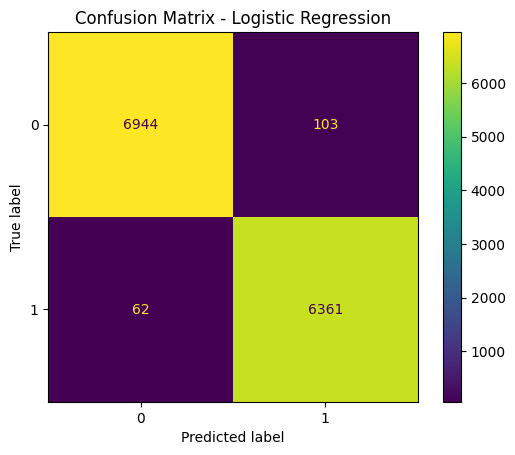

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Logistic Regression
ConfusionMatrixDisplay.from_predictions(y_test, pred_lr)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

### Naive Bayes Model

In [49]:
from sklearn.naive_bayes import MultinomialNB

In [50]:
NB = MultinomialNB()

In [51]:
NB.fit(xv_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [52]:
pred_nb = NB.predict(xv_test)

In [53]:
NB.score(xv_test, y_test)

0.9466221232368226

In [54]:
from sklearn.metrics import accuracy_score, classification_report

In [55]:
print("Naive Bayes Accuracy:", accuracy_score(y_test, pred_nb))

Naive Bayes Accuracy: 0.9466221232368226


In [56]:
print(classification_report(y_test, pred_nb))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      7047
           1       0.94      0.95      0.94      6423

    accuracy                           0.95     13470
   macro avg       0.95      0.95      0.95     13470
weighted avg       0.95      0.95      0.95     13470



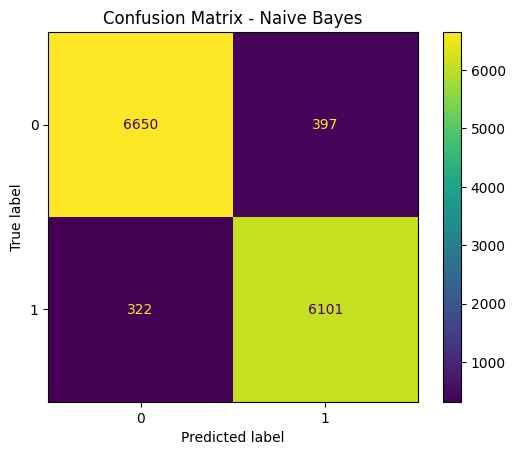

In [57]:
# Naive Bayes
ConfusionMatrixDisplay.from_predictions(y_test, pred_nb)
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

### SVM model

In [58]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [59]:
SVM = LinearSVC()

In [60]:
SVM.fit(xv_train, y_train)

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


In [61]:
pred_svm = SVM.predict(xv_test)

In [62]:
print("SVM Accuracy:", accuracy_score(y_test, pred_svm))

SVM Accuracy: 0.9953971789161099


In [63]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7047
           1       1.00      0.99      1.00      6423

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



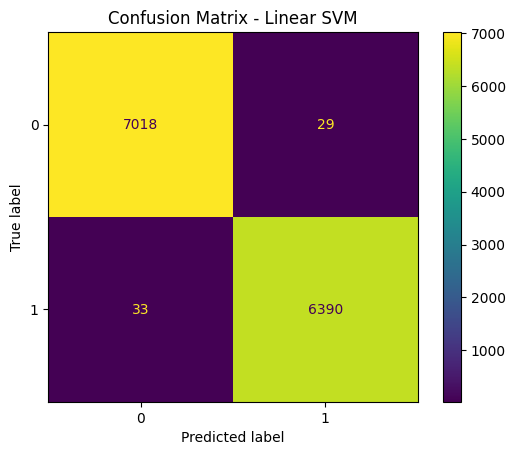

In [64]:
# SVM
ConfusionMatrixDisplay.from_predictions(y_test, pred_svm)
plt.title("Confusion Matrix - Linear SVM")
plt.show()

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [66]:
results = pd.DataFrame([
    {
        "Model": "Logistic Regression",
        "Accuracy": accuracy_score(y_test, pred_lr),
        "Precision": precision_score(y_test, pred_lr),
        "Recall": recall_score(y_test, pred_lr),
        "F1-Score": f1_score(y_test, pred_lr),
    },
    {
        "Model": "Naive Bayes",
        "Accuracy": accuracy_score(y_test, pred_nb),
        "Precision": precision_score(y_test, pred_nb),
        "Recall": recall_score(y_test, pred_nb),
        "F1-Score": f1_score(y_test, pred_nb),
    },
    {
        "Model": "Linear SVM",
        "Accuracy": accuracy_score(y_test, pred_svm),
        "Precision": precision_score(y_test, pred_svm),
        "Recall": recall_score(y_test, pred_svm),
        "F1-Score": f1_score(y_test, pred_svm),
    }
])

In [67]:
results.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy,Precision,Recall,F1-Score
2,Linear SVM,0.995397,0.995482,0.994862,0.995172
0,Logistic Regression,0.987751,0.984066,0.990347,0.987196
1,Naive Bayes,0.946622,0.938904,0.949868,0.944354


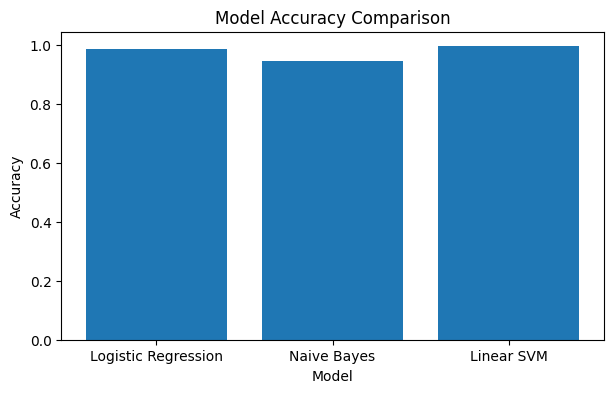

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.bar(results["Model"], results["Accuracy"])
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()

### Testing

In [72]:
def predict(model, text):
    # preprocess text
    text = wordopt(text)

    # vectorize
    vector = vectorization.transform([text])

    # predict
    prediction = model.predict(vector)[0]

    return "Real News" if prediction == 1 else "Fake News"

In [73]:
def compare_models(text):
    print("Input News Article:\n")
    print(text)

    print("\nLogistic Regression Prediction:")
    print(predict(LR, text))

    print("\nNaive Bayes Prediction:")
    print(predict(NB, text))

    print("\nLinear SVM Prediction:")
    print(predict(SVM, text))

In [74]:
compare_models("""BREAKING: shocking truth exposed! government secretly printing unlimited money and hiding it
from the public. this will destroy the economy and control citizens. share before it gets deleted!
""")

compare_models("""WASHINGTON (Reuters) - The government announced on Tuesday a set of measures aimed at
reducing inflation, including changes to import taxes and fuel pricing, according to an official
statement released by the finance ministry.
""")

Input News Article:

BREAKING: shocking truth exposed! government secretly printing unlimited money and hiding it
from the public. this will destroy the economy and control citizens. share before it gets deleted!


Logistic Regression Prediction:
Fake News

Naive Bayes Prediction:
Fake News

Linear SVM Prediction:
Fake News
Input News Article:

WASHINGTON (Reuters) - The government announced on Tuesday a set of measures aimed at
reducing inflation, including changes to import taxes and fuel pricing, according to an official
statement released by the finance ministry.


Logistic Regression Prediction:
Real News

Naive Bayes Prediction:
Real News

Linear SVM Prediction:
Real News
